# DS 2500 Day 15

Mar 3, 2023


## Content:
Regression 
- like a classifier, but predicts a continuous feature instead of a nominal one

## Admin:
- project teams:
    - if your team was matched, one person should send a note to all others to set a first meeting
    - if your team hasn't yet been created:
        - see note on piazza
        - email Alex when you've got team members
- project mentors:
    - each team will be assigned one TA mentor, we hope to have this done for you the monday we're all back from break
        - our TAs pick which projects they'd like to support, so you all get a mentor who's interested in your project!

#### Data Credit:
The blue bike data was collected and cleaned by Piotr Sapiezynski (https://www.sapiezynski.com/)  https://www.bluebikes.com/system-data

## Regression: Motivation
### How many people use Boston's bike sharing on a hot (or cold) day?

In [1]:
import pandas as pd

df = pd.read_csv('bluebike_201910.csv', index_col='date')
df.head()

,trip_count,temp,wind,rain
date,,,,
2019-10-01,12183,69,13,0
2019-10-02,9071,66,11,1
2019-10-03,11496,54,9,0
2019-10-04,11767,60,16,0
2019-10-05,9315,56,9,0


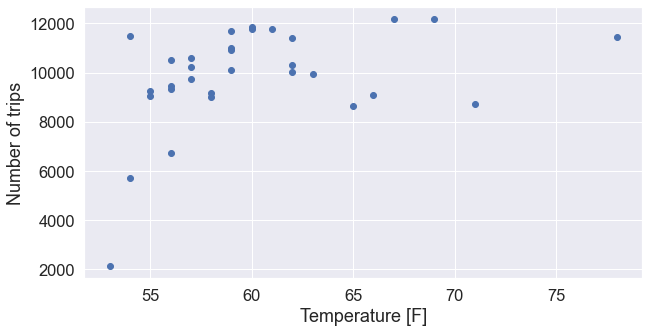

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
plt.scatter(df['temp'], df['trip_count'])
plt.xlabel('Temperature [F]')
plt.ylabel('Number of trips')
plt.gcf().set_size_inches(10, 5)


* Regression:
    - predicting a continuous number from input data
* We will predict the number of blue bike trips in October 2019 based on the temperature:
    * intuition from graph:
        - higher temp -> more bike trips

## Linear regression
Regression seeks to find coefficients $a_0, a_1$ so that the function:

$$ \hat{y} = a_1 x + a_0 $$

is able to predict $y$ from $x$.

* $x$ is our input data 
    - (temperature on a given day)
* $y$ is the outcome we're predicting 
    - (number of bike trips on same day)

To learn the function we 
1. observe paired observations of $(x, y)$ 
    - (this is akin to observing the scatter plot above)
1. find the $a_i$ coefficients which best map $x$ to $y$.
    - (this is akin to drawing a line through the scatter which "best" fits the points)

# What do $a_1$ and $a_0$ mean?

## Algebraic meaning:
- $a_1$ is the slope of the line
    - when x increases by 1, how much does y change?
- $a_0$ is the y-intercept of the line
    - when x=0, what value is y?
   
## Application meaning (from algebraic meaning):
Returning to our blue bike example where:
- x is the temperature
- y is the number of riders on a given day


- because $a_1$ is the increase in y when x increases by 1
    - it represents the increase in riders because the temperature goes up by 1
- because $a_0$ is the value of y when x=0
    - it represents the number of riders our model predicts when temperature=0

## Often there is no $a_1$ and $a_0$ which "fits" every observation...

Specifying $a_1$ and $a_0$ is equivilent to specifying a straight line.  

Can we fit a straight line through all these observations?  (very often: no)

Text(0, 0.5, 'y')

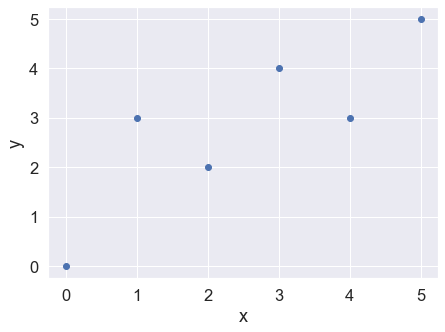

In [3]:
x = [0, 1, 2, 3, 4, 5]
y_true = [0, 3, 2, 4, 3, 5]

plt.scatter(x, y_true)
plt.gcf().set_size_inches(7, 5)
plt.xlabel('x')
plt.ylabel('y')

## ... lets find the line which "best" fits these points

### Regression Recipe
1. Choose some "form" of the relationship between x and y:
    - `y_pred = a_1 * x + a_0`
        - this is a simple model, we could have chosen others too (more next lesson)
            - a polynomial: `y_pred = a_2 * x ** 2 + a_1 * x +  a_0`
            - exponential: `y_pred = a_1 * np.exp(x)
    - remember the $a_i$ coefficients define the position of the line above
1. Quantify what a "good" model is
    - We want to minimize average distance from predicted y to observed y
        - see MSE on next slide
1. `.fit()` the model parameters to maximize how "good" the model is
    - Choose $a_0, a_1$ to draw a line which is as close as possible to all the points
        - "as close as possible" = minimize average distance from predicted y to observed y

### Mean of Squared Errors (MSE): Intuition
Before formally defining **Mean of Squared Error (MSE)**, lets build our intuition of it:
- MSE measures how closely a line (i.e. $a_1, a_0$) comes to all observations $(x, y)$
- MSE is 0 when the line goes through all points exactly
    - in other words, some $a_1, a_0$ has, for every pair $(x, y)$:
    $$\hat{y} = a_1 x + a_0 = y $$
- MSE is large when the line is far from many pairs $(x, y)$

# The best line $(a_1, a_0)$ is the one which minimizes MSE

In [4]:
import numpy as np

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='y_true')
    
    # compute linear predictions 
    # x is a numpy array so each element gets mulitplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='y_pred (regression)')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        # compute predicted position
        y_pred_i = slope * x_i + intercept
        
        # plot error
        plt.plot([x_i, x_i], [y_i, y_pred_i], 
                 ls='--', lw=3, color='tab:red',
                 label='error' if idx == 0 else "")
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    
    # compute mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    
    # add title which shows model and MSE
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
    plt.gcf().set_size_inches(10, 5)
 

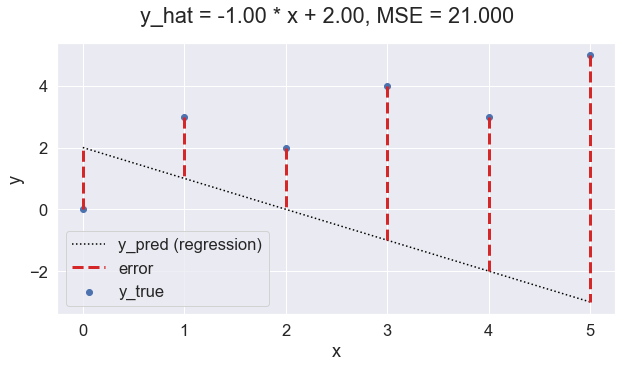

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 2, 4, 3, 5]
show_fit(x, y, slope=-1, intercept=2)

The error of the j-th data point is the distance between our estimate $\hat{y}$ and the observed $y$ (length of dotted red line above)

$$\texttt{Error}_j = \hat{y} - y = a_1 x + a_0 - y$$

This definition "Mean of Squared Errors" is more than a name, its a recipe:

How to compute MSE:
1. Compute the error of every observation (length of red line)
1. Square each error
1. Compute average of all squared errors


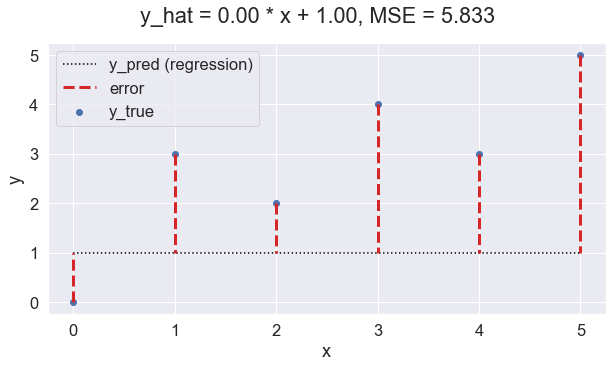

In [6]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 2, 4, 3, 5]
show_fit(x, y, 0, 1)

In [7]:
error = np.array([1, -2, -1, -3, -2, -4])
error_sq = error ** 2
error_sq

array([ 1,  4,  1,  9,  4, 16])

In [8]:
mse = np.mean(error_sq)
mse

5.833333333333333

$$
    MSE = \frac{1}{n}\sum_{j} {(\hat{y}_j - y_j)^2}
$$

where 
- $(x_j, y_j)$ are the paired observations
- n is the total number of paired observations
- j is the observation index 
    - (first observation is 0, next is 1, ...)

# Manually "fitting" a regression line

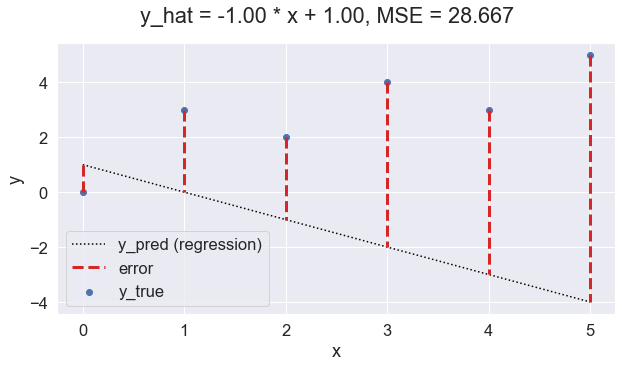

In [9]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 2, 4, 3, 5]
show_fit(x, y, -1, 1)

# In Class Assignment 1

Given the paired observations:
```python
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])
```
1. Find an $a_1, a_0$ (slope, intercept) which get close to the minimum MSE (guess and check via `show_fit()`)
1. Compute the MSE of the line $a_1 = 0, a_0 =$ `np.mean(y)` by hand
    - stuck? skip to the next part and come back to this computation
1. Verify your answer using `show_fit()`
1. This computation feels oddly familiar ... can you identify where we've seen it before?

Use the `show_fit()` function to try and find $a_1, a_0$ which  MSE is the smallest in the following dataset:

In [10]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])

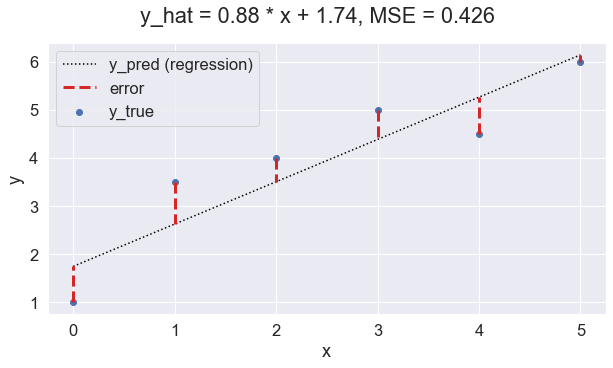

In [11]:
show_fit(x, y, slope = 0.88, intercept=1.74)

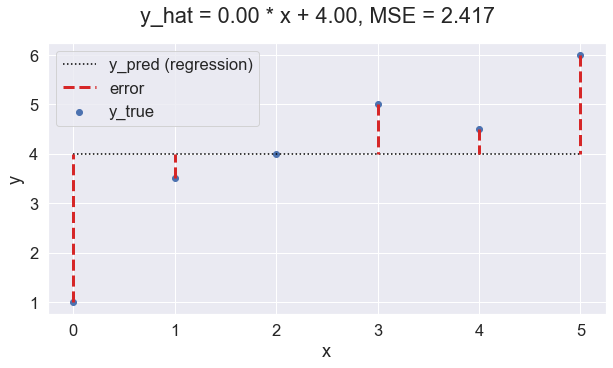

In [12]:
# verifying MSE
show_fit(x, y, slope=0, intercept=np.mean(y))

In [13]:
y_pred = x * 0 + np.mean(y)
error = y_pred - y
print(error)

[ 3.   0.5  0.  -1.  -0.5 -2. ]


In [14]:
error_sq = error ** 2
mse = np.mean(error_sq)
print(mse)

2.4166666666666665


In [15]:
# same as variance
np.var(y)

2.4166666666666665

## ICA 1 motivates two questions:
1. How can we avoid guessing and checking and find the best $a_0, a_1$?
1. What is the relationship between MSE and the sample variance of y?

## How can we avoid guessing and checking and find the best $a_0, a_1$?

```python
from sklearn.linear_model import LinearRegression

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])

reg = LinearRegression()
reg.fit(x, y)
slope = reg.coef_[0]
intercept = reg.intercept_
```

which yields

    ValueError: Expected 2D array, got 1D array instead:
    array=[0 1 2 3 4 5].
    Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
    
### don't forget

the input $x$ of all our sklearn models must have shape (n_samples, n_features)


In [16]:
x = np.array([0, 1, 2, 3, 4, 5])
x.shape

(6,)

this is a 1d array, sklearn can't identify whether its:
- a single sample with 6 distinct features? (no)
- 6 distinct samples each with one feature? (yes)

In [17]:
x = x.reshape((-1, 1))
x.shape

(6, 1)

In [18]:
from sklearn.linear_model import LinearRegression

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])

# reshape x to specify it is 1 feature and many samples
x = x.reshape((-1, 1))

# initialize sklearn model
reg = LinearRegression()

# fit the model
reg.fit(x, y)

# same as a_1
slope = reg.coef_[0]

# same as a_0
intercept = reg.intercept_

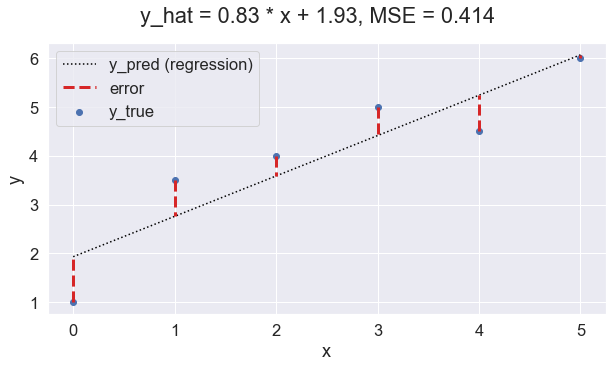

In [19]:
show_fit(x, y, slope, intercept)

ICA 1 motivates two questions:
1. ~How can we avoid guessing and checking and find the best $a_0, a_1$?~
    - `from sklearn.linear_model import LinearRegression`
1. What is the relationship between MSE and variance of y?

## What is the relationship between MSE and the sample variance of y?

Remember,
$$
    MSE = \frac{1}{n}\sum_j{( \hat{y_j} - y_j)^2}
$$

Look familiar?
$$\sigma^2 = \frac{1}{n}\sum_j{(\bar{y} - y_j)^2} $$
where $\bar{y}$ is the mean of our observed samples of $y$.


# Sample variance is the MSE of a line which predicts each $\hat{y}_j = \bar{y}$

What kind of line would give the same prediction (the sample mean) for each sample?
- a horizontal line at the sample mean

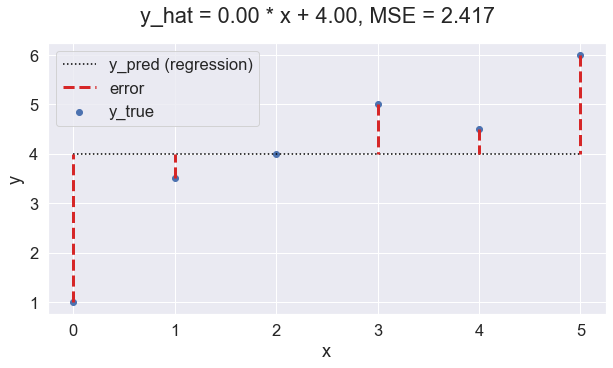

In [20]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([1, 3.5, 4, 5, 4.5, 6])
y_sample_mean = y.mean()
show_fit(x, y, slope=0, intercept=y_sample_mean)

In [21]:
# feel familiar? (see MSE in graph above)
np.var(y)

2.4166666666666665

## An Intuition Honing Example: MSE and Variance of Y

Whats the minimum MSE of predicting $\hat{y} = a_1 x + a_0$ where:
- y = stock price increase on a given day
- x = number of coffees consumed by CEOs parents on the same day

1. As x increases, we don't observe changes in y
    - assume: x and y uncorrelated
1. Therefore, slope = $a_1 = 0$
1. To minimize MSE our best y prediction is to assign intercept = $a_0 = \bar{y}$
1. From above, an estimate of MSE of this model is sample variance: `np.var(y)`

# Variance of Y is the "worst" MSE you will get

- At worst, if you try to predict some y using uncorrelated x
    - MSE = Var(y)
- As x shows some stronger correlation with y (making it useful for prediction)
    - MSE decreases
    
#### Don't forget: 
MSE is always positive
    - error is a "distance" from `y_true` to `y_pred`

## $R^2$ is the percentage of variance of y which can be explained by the model

$$R^2 = 1-\frac{MSE}{\sigma_y^2}$$

$R^2$ is the percent of variance of y explained by x (under model)

Intuition:
- $R^2 = 0$
    - x, using this model, doesn't explain any of the variance of y
- $R^2 = .5$
    - x, using this model, explains half the variance of y
- $R^2 = 1$
    - x, using this model, explains all the differences in y

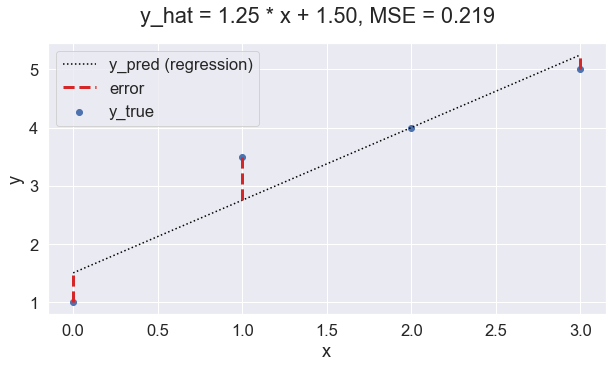

In [22]:
from sklearn.metrics import r2_score

x = np.array([0, 1, 2, 3]).reshape(-1, 1)
y = np.array([1, 3.5, 4, 5])

reg = LinearRegression()
reg.fit(x, y) 

# get the slope
slope = reg.coef_[0]

# get the intercept
intercept = reg.intercept_

# same as y_pred = slope * x + intercept
y_pred = reg.predict(x)

show_fit(x, y, slope, intercept)

In [23]:
# computing R2 from our formula (just to check that Prof Higger isnt pulling our leg)
R2 = 1 - (get_mse(y_pred, y) / np.var(y))

# computing R2 from sklearn (easy to work with, doesn't inspire our intuition with its use)
R2_easy = r2_score(y_true=y, y_pred=y_pred)

assert R2 == R2_easy, 'r2_score() doesnt agree with our formula'

print(R2)

0.8992805755395684


Our linear fit explains 89% of variance.

## Guess that $R^2$: part 0

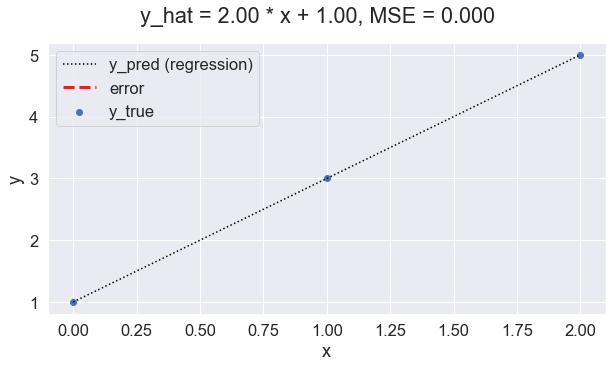

In [24]:
# Let's try with data than can be fit perfectly.
x = np.array([0, 1, 2]).reshape(-1, 1)
y = np.array([1, 3, 5])

reg = LinearRegression()
reg.fit(x, y) 
slope = reg.coef_[0]
intercept = reg.intercept_

show_fit(x, y, slope, intercept)

In [25]:
# two lines below compute the same thing:
y_pred = slope * x + intercept
y_pred = reg.predict(x) 

# computing R2 from sklearn
r2 = r2_score(y_true=y, y_pred=y_pred)
r2

1.0

## Guess that $R^2$: part 1

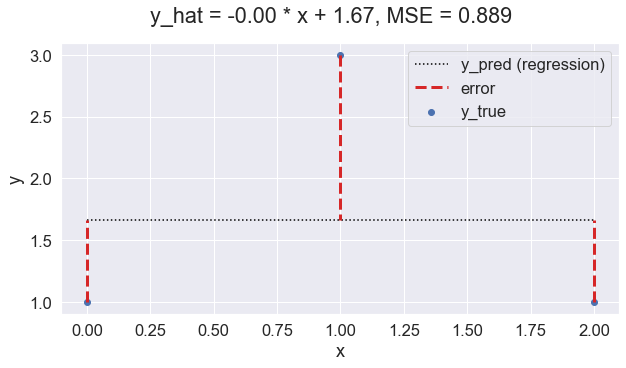

In [26]:
# Let's try with data that is not correlated
x = np.array([0, 1, 2]).reshape(-1, 1)
y = np.array([1, 3, 1])

reg = LinearRegression()
reg.fit(x, y) 
slope = reg.coef_[0]
intercept = reg.intercept_

show_fit(x, y, slope, intercept)

In [27]:
# computing R2 from sklearn
y_pred = reg.predict(x)
r2 = r2_score(y_true=y, y_pred=y_pred)
r2

0.0

## Guess that $R^2$: part 2

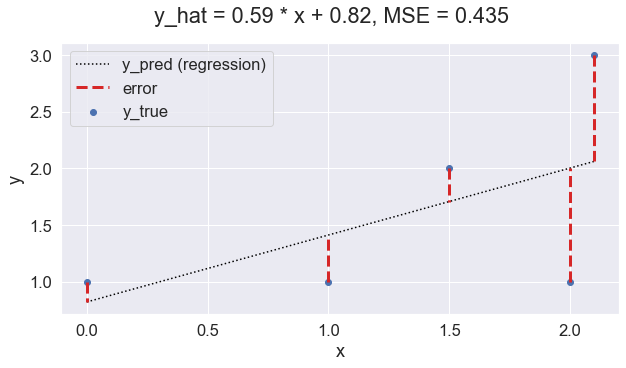

In [28]:
# Let's try with data that is a little bit correlated
x = np.array([0, 1, 1.5, 2, 2.1]).reshape(-1, 1)
y = np.array([1, 1, 2, 1, 3])

reg = LinearRegression()
reg.fit(x, y) 
slope = reg.coef_[0]
intercept = reg.intercept_

show_fit(x, y, slope, intercept)

In [29]:
from sklearn.metrics import r2_score

# computing R2 from sklearn
y_pred = reg.predict(x)
r2 = r2_score(y_true=y, y_pred=y_pred)
r2

0.3209379240162824

## Whats a 'good' $R^2$ value?

... it depends:

- if you're predicinting price changes in stock market: cross validated $R^2 = .01$ is fantastic!
    - if you keep using your model to make bets, you'll come out ahead
        - if this is the case, give me a call: I'd like to invest in your startup :)
- if you're predicting how many people will rent a blue bike (y) given weather (x): cross validated $R^2 = .01$ is not so great
    - adding weather information into your model barely changes predictions
    
    
More generally, $R^2$ should be interpretted in the context of the application.  Like Accuracy, its context dependent:

- baseball player who "accurately" gets base hit 50% of at-bats is better than any hitter to every play the game
- pilot who "accurately" lands the plan without crashing 50% of the time might not be as celebrated ...

# Shouldn't you be cross-validating $R^2$?

... we're `.fit()` ing and `.predict()`ing on the same samples!

- one cross-validates $R^2$ values to 
    - estimate performance in predicting new samples
- it is also common to **not** cross-validate an $R^2$ when we want to examine a model's parameters
    - how many more riders get on a blue bike when the temperature goes up 1 degree fahrenheit?
        - `y_pred = a_1 * temp + a_0`

# In Class Assignment 2

Predict y=`trip_count` from x=`temp` by ...
1. `.fit()`ing a LinearRegression to predict y from x
1. visually inspect your results using `show_fit()`
1. store the following values in a new dataframe `df_regress` (see table immediately below)
    - slope 
    - intercept
    - mse
    - r2
1. Repeat the three steps above for each new x value below.  (Use a loop)
    - x=`wind`
    - x=`rain`
    - x=`temp_c` (temperature in celsius)
        - `temp_c` = (`temp` - 32) / 1.8
        
Your final `df_regress` should look similar to below:

|        |       r2 |          mse |        slope |    intercept |
|-------:|---------:|-------------:|-------------:|-------------:|
|   temp | 0.150487 | 3.548955e+06 |   144.646765 |  1157.497714 |
| temp_c | 0.150487 | 3.548955e+06 |   260.364178 |  5786.194210 |
|   wind | 0.137007 | 3.605272e+06 |  -119.156711 | 11469.348993 |
|   rain | 0.271195 | 3.044684e+06 | -2224.622727 | 10644.350000 |
    
Using the results above, answer the following questions
1. Which of the four features, `temp`, `wind`, `rain` or `temp_c` best predicts changes in `trip_count`?  
1. Explain, to a non-technical expert, the meaning of each value in the slope column above
    - i.e. if "slope" of "temp" is 144.64, what does this mean?

In [30]:
import pandas as pd

df_bike = pd.read_csv('bluebike_201910.csv')

df_bike.head()

,date,trip_count,temp,wind,rain
0,2019-10-01,12183,69,13,0
1,2019-10-02,9071,66,11,1
2,2019-10-03,11496,54,9,0
3,2019-10-04,11767,60,16,0
4,2019-10-05,9315,56,9,0


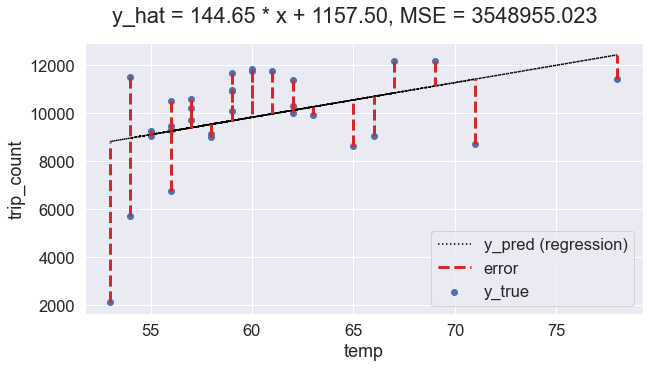

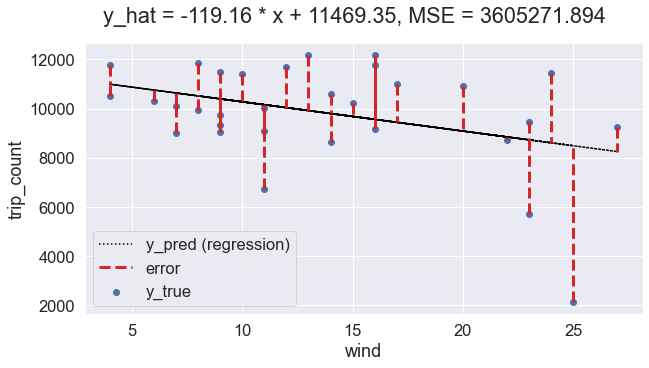

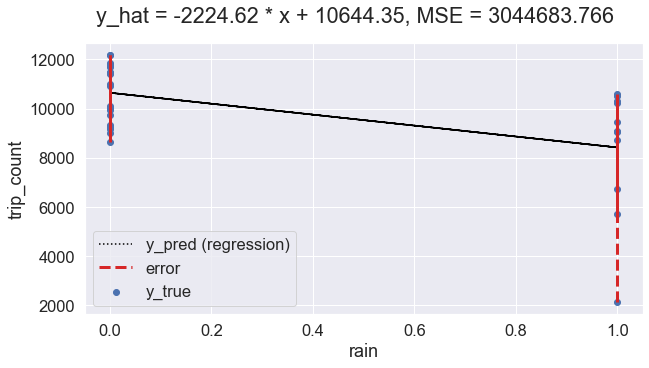

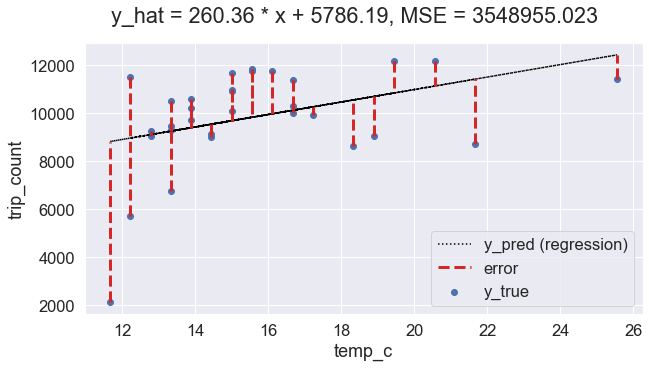

In [31]:
# convert temp to c
df_bike['temp_c'] = (df_bike['temp'] - 32) / 1.8 

# initialize empty table of regression stats
df_regress = pd.DataFrame()

# initalize regression object
reg = LinearRegression()

# get target variable
y = df_bike['trip_count'].values

x_feat = df_bike.columns[2:]


for feature in x_feat:
    # get x feature
    x = df_bike.loc[:, feature].values.reshape(-1,1)
    
    # fit regression
    reg.fit(x, y)
    
    # observing regression
    m = reg.coef_[0]
    b = reg.intercept_
    show_fit(x, y, slope = m, intercept = b)
    plt.xlabel(feature)
    plt.ylabel('trip_count')
    
    # make a prediction
    y_pred = reg.predict(x)
    
    # store regression stats
    df_regress.loc[feature, 'r2'] = r2_score(y_true = y, y_pred = y_pred)
    df_regress.loc[feature, 'mse'] = get_mse(y_pred, y)
    df_regress.loc[feature, 'slope'] = reg.coef_[0]
    df_regress.loc[feature, 'intercept'] = reg.intercept_
    
    